## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggColumn = 'Tumor Volume (mm3)'
agg_mean = merged[aggColumn].mean()
agg_median = merged[aggColumn].median()
agg_var = merged[aggColumn].var()
agg_std = merged[aggColumn].std()
agg_sem = st.sem(merged[aggColumn])
aggData = [['Mean', agg_mean], 
           ['Median', agg_median], 
           ['Variance', agg_var], 
           ['Standard Deviation', agg_std],
           ['SEM', agg_sem]
          ]
newdf = pd.DataFrame(aggData, columns = ['Aggregate', 'Tumor Volume (mm3)'])
newdf.head()

,Aggregate,Tumor Volume (mm3)
0,Mean,50.448381
1,Median,48.951474
2,Variance,79.116074
3,Standard Deviation,8.894722
4,SEM,0.204436


## Bar plots

Text(0, 0.5, 'Number of Data Points')

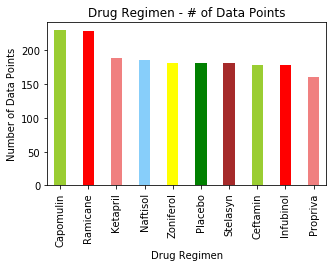

In [73]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grp = "Drug Regimen"

# Collect the data points 
x = merged.groupby(grp)["Mouse ID"].count()

# convert from series to dataframe
df = pd.DataFrame(x).reset_index()
df.columns = ['Drug Regimen', 'Data Points']
df = df.sort_values('Data Points', ascending = False)

# Assign colors
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "green", "brown"]

# Dataframe plot
df.plot(kind='bar',
        x='Drug Regimen',
        y='Data Points', 
        color=colors, 
        legend = False, 
        title="Drug Regimen - # of Data Points",
        figsize= (5,3),
        width=0.4
       )

# Give the chart an x label, and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

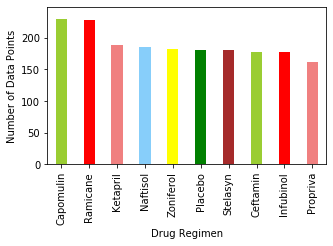

In [101]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Reuse same dataframe + colors from previous

x_axis = df[grp]
tick_locations = [value for value in x_axis]

# Set figure size to adjust for space
plt.figure(figsize=(5,3))

# Tighten up!
plt.xlim(-0.50, len(x_axis)-0.5) # horizontal "fit"
plt.ylim(0, max(df["Data Points"]) + 19) # vertical "fit"

plt.bar(x_axis, 
        df["Data Points"], 
        color=colors, 
        alpha=1, 
        align="center",
        width=0.4
       )

# Twist the labels 
plt.xticks(tick_locations, df[grp], rotation="vertical")

# Give the chart an x label, and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

## Pie plots

[Text(0, 0.5, '')]

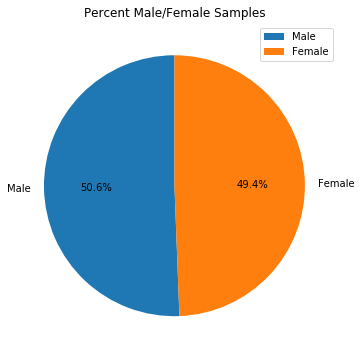

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp = "Sex"

# Collect the data points 
x = merged.groupby(grp)["Mouse ID"].count()

# convert from series to dataframe
df = pd.DataFrame(x).reset_index()
df.columns = ['Sex', 'Mice']
df = df.sort_values('Mice', ascending = False)
df.index = df["Sex"]

plot = df.plot(kind='pie'
        , y='Mice'
        , figsize=(6, 6)
        , autopct='%1.1f%%'
        , startangle=90
        , legend = True
        , title="Percent Male/Female Samples"
       )
plot.set(ylabel="")

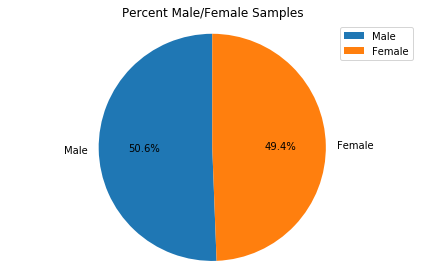

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Colors
# colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['Mice'],
    # with the labels being officer names
    labels=df['Sex'],
    # with no shadows
    shadow=False,
    # with colors
    # colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set the title and legend
plt.legend(df['Sex'])
plt.title("Percent Male/Female Samples")

# View the plot
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [6]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [7]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [8]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [9]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [10]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen